In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


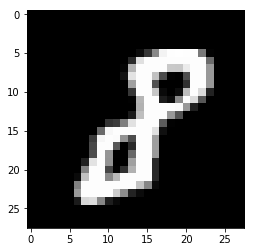

In [16]:
img = mnist.train.images[100].reshape(28,28)
plt.imshow(img, cmap='gray')

In [3]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [5]:
hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [6]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [7]:
# train
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

('Epoch:', '0001', 'cost =', '5.362759903')
('Epoch:', '0002', 'cost =', '1.779821367')
('Epoch:', '0003', 'cost =', '1.181739815')
('Epoch:', '0004', 'cost =', '0.930310364')
('Epoch:', '0005', 'cost =', '0.786582000')
('Epoch:', '0006', 'cost =', '0.693053110')
('Epoch:', '0007', 'cost =', '0.626525508')
('Epoch:', '0008', 'cost =', '0.577235948')
('Epoch:', '0009', 'cost =', '0.538299583')
('Epoch:', '0010', 'cost =', '0.508071716')
('Epoch:', '0011', 'cost =', '0.483244077')
('Epoch:', '0012', 'cost =', '0.461629858')
('Epoch:', '0013', 'cost =', '0.444460331')
('Epoch:', '0014', 'cost =', '0.429089073')
('Epoch:', '0015', 'cost =', '0.415773713')


In [ ]:
print('Learning Finished!')
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={ X: mnist.test.images, Y: mnist.test.labels}))